## Backscatter Energy and Depth Distribution
Monte Carlo model the energy distribution of backscattered electrons.  Towards the end of the document we also consider how a deep an electron gets before it is backscattered.

In [8]:
# Load the necessary libraries.
using NeXLCore, Gadfly

In [9]:
e0 = 20.0e3 # eV
mat, cmat = material("U3O8",18.0), pure(n"C")

(U3O8[U=0.8480,O=0.1520,18.00 g/cm³], Pure C[C=1.0000,1.82 g/cm³])

The strategy is to run a series of trajectories.  I keep track of the electron energy at each step but the only one that matters is the last step which I record in a vector of final energies.  The final energy vector is filtered to remove all the electrons which ran out of energy in the material (E<50 eV) to leave the backscattered electron energies.  This is plotted as a histogram.

First consider a bulk sample of U3O8.  You'll notice that the distribution is weighted towards high energy backscatters.  This is the result of the heavy U nucleus producing near 180 degree elastic scattering events.

  7.097689 seconds (101.16 M allocations: 2.049 GiB, 6.16% gc time)


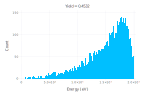

In [16]:
sample = bulk(mat)
traj = 10000
finalEs = Float64[]
@time for i in Base.OneTo(traj)
  eFinal = 0.0
  trajectory(gun(Electron, e0, 1.0e-6), sample) do part, reg
    eFinal = energy(part)
  end
  push!(finalEs, eFinal)
end
# Filter out those that ran out of energy in the substrate (final E < 50 eV)
backscattered = filter(e->e>50.0, finalEs)
# Use Gadfly to plot the result as a histogram
plot(x=backscattered, Geom.histogram(bincount=100), Guide.title("Yield = $(length(backscattered)/traj)"),Guide.xlabel("Energy (eV)"), Guide.ylabel("Count"))

Now consider a carbon substrate.  The yield is much lower and the distribution is broader and weighted towards mid-energy backscatters.  This is because the lighter C nucleus is less likely to produce high angle scatters but instead the backscatters are the result of many small angle scatters.

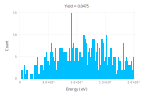

In [11]:
sample = bulk(cmat)
traj = 10000
finalEs = Float64[]
for i in Base.OneTo(traj)
  eFinal = 0.0
  trajectory(gun(Electron, e0, 1.0e-6), sample) do part, reg
    eFinal = energy(part)
  end
  push!(finalEs, eFinal)
end
# Filter out those that ran out of energy in the substrate (final E < 50 eV)
backscattered = filter(e->e>50.0, finalEs)
# Use Gadfly to plot the result as a histogram
plot(x=backscattered, Geom.histogram(bincount=100), Guide.title("Yield = $(length(backscattered)/traj)"),Guide.xlabel("Energy (eV)"), Guide.ylabel("Count"))

Finally, let's consider a thin film of U3O8 on a carbon substrate.  You'll see elements of both the U3O8 and C distributions.  There is a peak at high energies from electrons which bound elastically back from the U3O8 but there is also a long tail from the electrons which penetrate into the carbon before being backscattered.

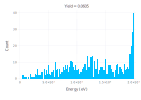

In [12]:
sample = NeXLCore.thin_film(mat=>0.1e-5,substrate=cmat)
traj = 10000
finalEs = Float64[]
for i in Base.OneTo(traj)
  eFinal = 0.0
  trajectory(gun(Electron, e0, 1.0e-6), sample) do part, reg
    eFinal = energy(part)
  end
  push!(finalEs, eFinal)
end
# Filter out those that ran out of energy in the substrate (final E < 50 eV)
backscattered = filter(e->e>50.0, finalEs)
# Use Gadfly to plot the result as a histogram
plot(x=backscattered, Geom.histogram(bincount=100), Guide.title("Yield = $(length(backscattered)/traj)"),Guide.xlabel("Energy (eV)"), Guide.ylabel("Count"))

Next we will consider how deep an electron gets before it is backscattered.  For U3O8, we see that the distribution of depths is peaked at low depths.  Again this is due to high angle backscatters of a heavy nucleus.  (Note: In both cases, we normalize by density to make comparison easier.)

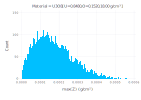

In [13]:
sample = bulk(mat)
traj = 10000
maxZs = Float64[]
for i in Base.OneTo(traj)
  maxZ, finalE = 0.0, 0.0
  trajectory(gun(Electron, e0, 1.0e-6), sample) do part, reg
    maxZ = max(maxZ, NeXLCore.position(part)[3])
    finalE = energy(part)
  end
  # If the last energy is greater than 50 eV, it must be a backscatter
  if finalE>50 # && maxZ<100.0
    push!(maxZs, mat[:Density]*maxZ)
  end
end
# Use Gadfly to plot the result as a histogram
plot(x=maxZs, Geom.histogram(bincount=100), Guide.title("Material = $mat"),Guide.xlabel("max(Z) (g/cm²)"), Guide.ylabel("Count"))

We don't see this peak with C.  The distribution of depths is broader.

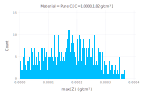

In [14]:
sample = bulk(cmat)
traj = 10000
maxZs = Float64[]
for i in Base.OneTo(traj)
  maxZ, finalE = 0.0, 0.0
  trajectory(gun(Electron, e0, 1.0e-6), sample) do part, reg
    maxZ = max(maxZ, NeXLCore.position(part)[3])
    finalE = energy(part)
  end
  # If the last energy is greater than 50 eV, it must be a backscatter
  if finalE>50 # && maxZ < 100.0
    push!(maxZs, cmat[:Density]*maxZ)
  end
end
# Use Gadfly to plot the result as a histogram
plot(x=maxZs, Geom.histogram(bincount=100), Guide.title("Material = $cmat"), Guide.xlabel("max(Z) (g/cm²)"), Guide.ylabel("Count"))